In [3]:
%matplotlib notebook
import numpy as np

import matplotlib

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.size'] = 8

<IPython.core.display.Javascript object>


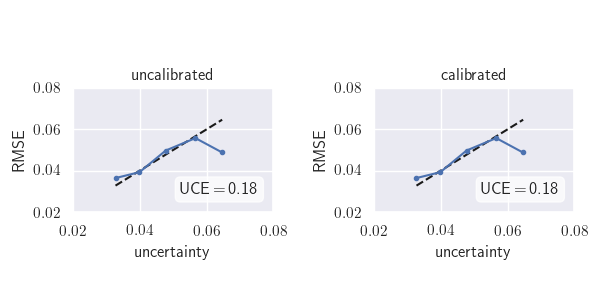

In [7]:
err_uncal = np.load("opener_err_in_bin_uncal.npy")
sigma_uncal = np.load("opener_avg_sigma_in_bin_uncal.npy")
err_cal = np.load("opener_err_in_bin_cal.npy")
sigma_cal = np.load("opener_avg_sigma_in_bin_cal.npy")
uce_uncal = np.load("opener_uce_uncal.npy")
uce_cal = np.load("opener_uce_cal.npy")

sns.set()
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.size'] = 8
aspect = 1/np.sqrt(2)
aspect = 2/(1+np.sqrt(5))

props = dict(boxstyle='round', facecolor='white', alpha=0.75)

fig, ax = plt.subplots(1, 2, figsize=(6, 3))

max_val = np.max([err_uncal.max(), sigma_uncal.max()])
min_val = np.min([err_uncal.min(), sigma_uncal.min()])
ax[0].plot([min_val, max_val], [min_val, max_val], 'k--')
ax[0].plot(sigma_uncal, err_uncal, marker='.')
ax[0].set_ylabel(r'RMSE')
ax[0].set_xlabel(r'uncertainty')
ax[0].set_aspect(aspect)
ax[0].set_title('uncalibrated')
ax[0].set_xticks([0.02, 0.04, 0.06, 0.08])
ax[0].set_yticks([0.02, 0.04, 0.06, 0.08])
textstr1 = r'UCE\,=\,{:.2f}'.format(uce_uncal.item()*100)
ax[0].text(0.925, 0.075/aspect, textstr1, transform=ax[0].transAxes, fontsize=12,
                verticalalignment='bottom',
                horizontalalignment='right',
                bbox=props
                )

#max_val = np.max([err_in_bin.cpu().max(), avg_sigma_in_bin.cpu().max()])
#min_val = np.min([err_in_bin.cpu().min(), avg_sigma_in_bin.cpu().min()])
ax[1].plot([min_val, max_val], [min_val, max_val], 'k--')
ax[1].plot(sigma_cal, err_cal, marker='.')
ax[1].set_ylabel(r'RMSE')
ax[1].set_xlabel(r'uncertainty')
ax[1].set_aspect(aspect)
ax[1].set_title('calibrated')
ax[1].set_xticks([0.02, 0.04, 0.06, 0.08])
ax[1].set_yticks([0.02, 0.04, 0.06, 0.08])
#ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
textstr2 = r'UCE\,=\,{:.2f}'.format(uce_cal.item()*100)
ax[1].text(0.925, 0.075/aspect, textstr2, transform=ax[1].transAxes, fontsize=12,
                verticalalignment='bottom',
                horizontalalignment='right',
                bbox=props
                )

fig.tight_layout()
fig.subplots_adjust(wspace = 0.5)
fig.show()
fig.savefig(f'opener.pdf', bbox_inches='tight', pad_inches=0)